<a href="https://colab.research.google.com/github/NikoriakViktot/Data_Science_Course_SSWU/blob/main/Neural_Network_v4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Мета
Ваше завдання передбачити, чи вижив пасажир під час катастрофи Титаніка чи ні. Для кожного з тестів ви повинні передбачити значення змінної 0 або 1.

# Опис датасету

     survival - Survival - Вижив (0 or 1)

     pclass - Ticket class - Клас квитка (1 = 1st, 2 = 2nd, 3 = 3rd)
     Indicator of socio-economic status
     1 = Upper
     2 = Average
     3 = Lower

     sex - Gender - Стать

     Age - Age in years - Вік

     Якщо значення віку менше 1, то це значення представляється у вигляді десяткового дробу
      Якщо вік орієнтовний або приблизний, то він буде записаний як xx.5.
     Наприклад, якщо вік оцінюється як 20 років, але точного значення немає, то буде написано 20,5.


     sibsp - Number of brothers and sisters / spouses on board - кількість братів і сестер пасажира

     parch - Number of parents/children on board кількість батьків/дітей на борту

     ticket - Ticket number номер квитка

     fare - Passenger fare - вартість квитка

     cabin - Cabin number - номер каюти

     embarked - Port of embarkation - порт посадки
                C = Cherbourg,
                Q = Queenstown,
                S = Southampton

# Підготовка середовища

https://www.lavivienpost.com/install-tensorflow-gpu-on-windows-complete-guide/
https://www.tensorflow.org/install/source_windows

Version	Python version	Compiler	Build tools	cuDNN	CUDA
tensorflow_gpu-2.10.0	3.7-3.10	MSVC 2019	Bazel 5.1.1	8.1	11.2

https://www.python.org/downloads/release/python-3810/
https://developer.nvidia.com/compute/machine-learning/cudnn/secure/8.1.1.33/11.2_20210301/cudnn-11.2-windows-x64-v8.1.1.33.zip
https://developer.download.nvidia.com/compute/cuda/11.2.0/local_installers/cuda_11.2.0_460.89_win10.exe

- install python for all users with enviromental variables
- install CUDA
- install cuDNN
- pip install tensorflow-gpu==2.10.0

In [ ]:
# !pip install catboost

In [ ]:
import pandas as pd
import numpy as np
import os
from numpy.random import seed

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, roc_auc_score, roc_curve, recall_score, precision_score
from sklearn.model_selection import cross_validate
# from yellowbrick.classifier import ROCAUC

from sklearn.feature_selection import mutual_info_classif

from sklearn.pipeline import make_pipeline

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import tree
from sklearn.tree import export_graphviz
from IPython.display import Image, display
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
# import xgboost as XGB
# from lightgbm import LGBMClassifier
# from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# !pip install tensorflow
# !pip install tensorflow-gpu==2.10

In [ ]:
!nvidia-smi

Tue Apr 22 22:17:45 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 566.36                 Driver Version: 566.36         CUDA Version: 12.7     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce GTX 1070      WDDM  |   00000000:01:00.0  On |                  N/A |
| N/A   63C    P0             31W /  115W |    1583MiB /   8192MiB |      2%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
import tensorflow as tf
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, LSTM, Flatten, Convolution2D, MaxPooling2D

In [ ]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

NameError: name 'tf' is not defined

In [ ]:
params = {'figure.figsize' : (16,10),
          'font.size' : 12,
          'axes.titlesize': 20}

bbox = {'boxstyle' : 'round',
        'pad' : 0.5,
        'facecolor' : 'white',
        'edgecolor' : 'black',
        'linewidth' : 1.5,
        'alpha' : 1}

matplotlib.rcParams.update(params)
%matplotlib inline

In [ ]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# df = pd.read_csv('drive/My Drive/Colab Notebooks/data/titanic/train.csv')
df = pd.read_csv(r'G:\Мій диск\Colab Notebooks\data\titanic\train.csv')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Viewing data

In [ ]:
df = df.drop('PassengerId', axis = 1)

In [ ]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.shape

(891, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [ ]:
data = {
        'Not NaN' : df.notna().sum(),
        'NaN' : df.isna().sum(),
        '% NaN' : round((df.isna().sum() / df.shape[0])*100,2)
       }

data = pd.DataFrame(data)
data

,Not NaN,NaN,% NaN
Survived,891,0,0.00
Pclass,891,0,0.00
Name,891,0,0.00
Sex,891,0,0.00
Age,714,177,19.87
SibSp,891,0,0.00
Parch,891,0,0.00
Ticket,891,0,0.00
Fare,891,0,0.00
Cabin,204,687,77.10


In [ ]:
df['Count_Cabins'] = np.nan

In [ ]:
df.loc[df['Cabin'].notna(),'Count_Cabins'] = df.loc[df['Cabin'].notna(),'Cabin'].apply(lambda x: len(x.split()))

In [ ]:
df['Cabin'] = df['Cabin'].str[0]

In [ ]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Count_Cabins
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,1.0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,1.0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN


In [ ]:
df['Name'] = df['Name'].apply(lambda x: x.split(", ")[1].split(".")[0])

In [ ]:
df['Count'] = df['Ticket'].apply(lambda x: len(x.split()))

In [ ]:
df.loc[df['Count']>1,'Ticket'] = df.loc[df['Count']>1,'Ticket'].apply(lambda x: x.split()[1])

In [ ]:
df = df.drop('Count', axis = 1)

In [ ]:
df = df.rename(columns={'Name': 'Status',
                        'Cabin': 'Cabin Type',
                        'Ticket':'Number_Ticket'})

In [ ]:
df.loc[df['Number_Ticket'] == '2.', 'Number_Ticket'] = 2

In [ ]:
df.loc[df['Number_Ticket'] == 'LINE', 'Number_Ticket'] = 0

In [ ]:
df.loc[df['Number_Ticket'] == 'Basle', 'Number_Ticket'] = 0

In [ ]:
df['Number_Ticket'] = df['Number_Ticket'].astype('int')

In [ ]:
# Кількість значень NaN
data = {
        'Not NaN' : df.notna().sum(),
        'NaN' : df.isna().sum(),
        '% NaN' : round((df.isna().sum() / df.shape[0])*100,2)
       }

data = pd.DataFrame(data)
data

,Not NaN,NaN,% NaN
Survived,891,0,0.00
Pclass,891,0,0.00
Status,891,0,0.00
Sex,891,0,0.00
Age,714,177,19.87
SibSp,891,0,0.00
Parch,891,0,0.00
Number_Ticket,891,0,0.00
Fare,891,0,0.00
Cabin Type,204,687,77.10


# Заповнення пропусків

In [ ]:
lst = df['Status'].value_counts().index
mean_age = []

for l in lst:
    mean_age.append(df[(df['Status'] == l) & (df['Age'].notna())]['Age'].mean())

In [ ]:

data = {
        'mean_age' : mean_age
       }

data = pd.DataFrame(data)
data = data.set_index(df['Status'].value_counts().index)
data['mean_age'] = data['mean_age'].astype('int')
data

,mean_age
Status,
Mr,32
Miss,21
Mrs,35
Master,4
Dr,42
Rev,43
Mlle,24
Major,48
Col,58


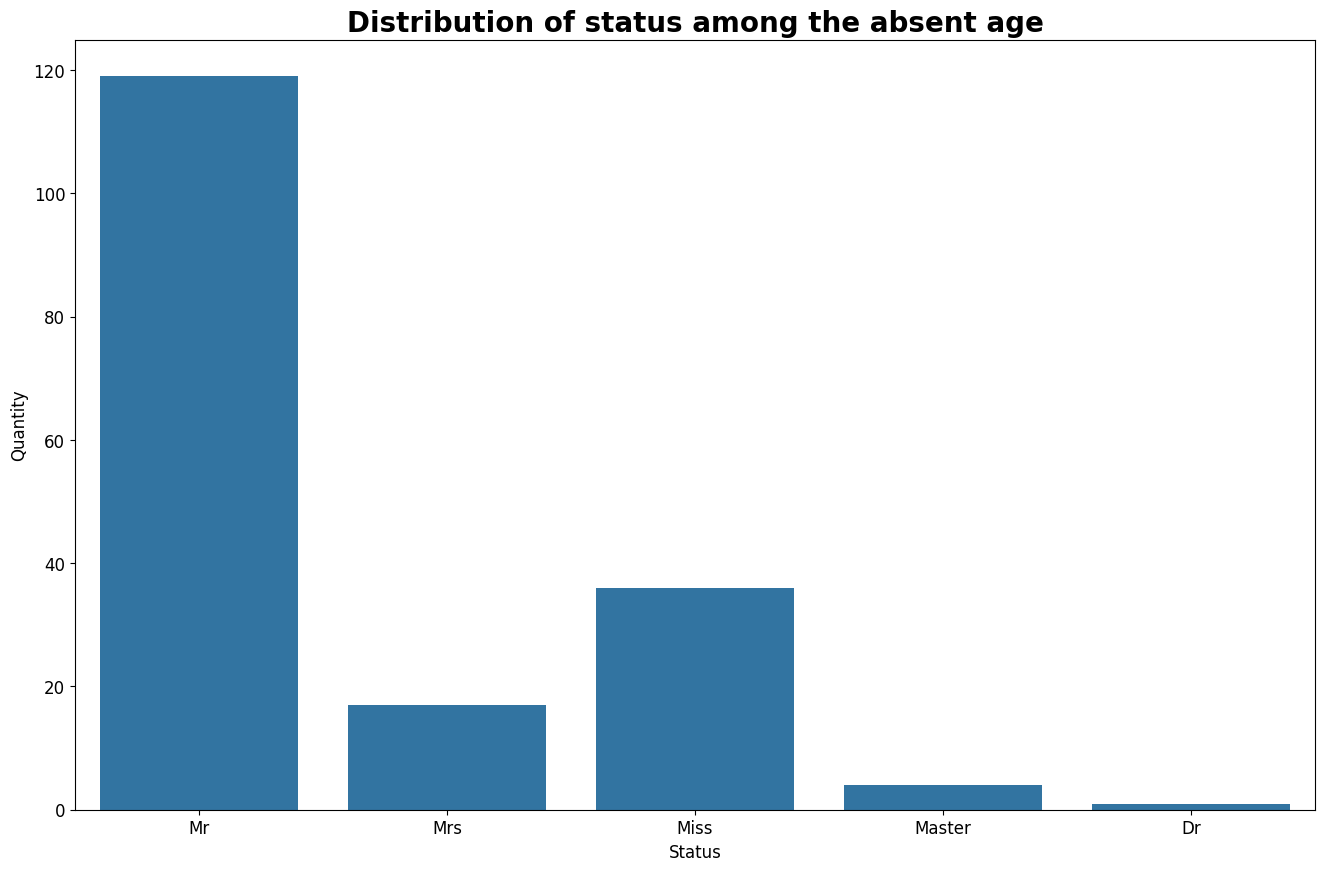

In [ ]:
sns.countplot(data = df[df['Age'].isna()],
             x = 'Status')
plt.title('Distribution of status among the absent age', fontweight = 'bold')
plt.xlabel('Status')
plt.ylabel('Quantity')
plt.show()

In [ ]:
df['Status'].nunique()

17


    Вік пропущений лише в наступних статусах:
    Mr
    Mrs
    Miss
    Master
    Dr

    Відповідно заповнюватимемо лише ці групи

In [ ]:
lst = df[df['Age'].isna()]['Status'].value_counts().index

for l in lst:
    df.loc[(df['Age'].isna())&(df['Status'] == l),'Age'] = df.loc[(df['Age'].isna())& (df['Status'] == l),'Age'].fillna(data.loc[l][0])

In [ ]:
df.isna().sum()

Survived           0
Pclass             0
Status             0
Sex                0
Age                0
SibSp              0
Parch              0
Number_Ticket      0
Fare               0
Cabin Type       687
Embarked           2
Count_Cabins     687
dtype: int64


Як бачимо пропуски віку відсутні.
Заповнимо 2 наявні пропуски в колонці Embedded


In [ ]:
df[df['Embarked'].isna()]

,Survived,Pclass,Status,Sex,Age,SibSp,Parch,Number_Ticket,Fare,Cabin Type,Embarked,Count_Cabins
61,1,1,Miss,female,38.0,0,0,113572,80.0,B,NaN,1.0
829,1,1,Mrs,female,62.0,0,0,113572,80.0,B,NaN,1.0


In [ ]:
Survived = df[df['Survived'] == 1]['Embarked'].mode()[0]
Pclass = df[df['Pclass'] == 1]['Embarked'].mode()[0]
Status_1 = df[df['Status'] == 'Miss']['Embarked'].mode()[0]
Status_2 = df[df['Status'] == 'Mrs']['Embarked'].mode()[0]
Sex = df[df['Sex'] == 'female']['Embarked'].mode()[0]
Age_38 = df[df['Age'] == 38]['Embarked'].mode()[0]
Age_62 = df[df['Age'] == 62]['Embarked'].mode()[0]
SibSp = df[df['SibSp'] == 0]['Embarked'].mode()[0]

lst = [Survived,Pclass,Status_1,Status_2,Sex,Age_38,Age_62,SibSp]

lst

['S', 'S', 'S', 'S', 'S', 'S', 'S', 'S']

In [ ]:
df.loc[df['Embarked'].isna(),'Embarked'] = df.loc[df['Embarked'].isna(),'Embarked'].fillna('S')

In [ ]:
index = df['Pclass'].value_counts().sort_index().index
pclass = []

for i in index:
    pclass.append(df[df['Pclass'] == i]['Cabin Type'].mode()[0])


Cabin_Type = {
        'Mode': pclass,

       }

Cabin_Type = pd.DataFrame(Cabin_Type)
Cabin_Type = Cabin_Type.set_index(index)
Cabin_Type

,Mode
Pclass,
1,C
2,F
3,F



    В 1 класі - тип каюти C
    В 2 класі - тип каюти - F
    В 3 класі - тип каюти - F


In [ ]:
for i in Cabin_Type.index:
    df.loc[(df['Cabin Type'].isna())&(df['Pclass'] == i),'Cabin Type'] = df.loc[(df['Cabin Type'].isna())&(df['Pclass'] == i),'Cabin Type'].fillna(Cabin_Type.loc[i][0])

In [ ]:
index = df['Cabin Type'].value_counts().sort_index().index
count = []
for i in index:
    count.append(df[df['Cabin Type'] == i]['Count_Cabins'].median())

Count_Cabins = {
        'Mode': count,

       }

Count_Cabins = pd.DataFrame(Count_Cabins)
Count_Cabins = Count_Cabins.set_index(index)
Count_Cabins

,Mode
Cabin Type,
A,1.0
B,1.0
C,1.0
D,1.0
E,1.0
F,1.0
G,1.0
T,1.0


In [ ]:
for i in Count_Cabins.index:
    df.loc[(df['Count_Cabins'].isna())&(df['Cabin Type'] == i),'Count_Cabins'] = df.loc[(df['Count_Cabins'].isna())&(df['Cabin Type'] == i),'Count_Cabins'].fillna(Count_Cabins.loc[i][0])

In [ ]:
# кількість NaN
data = {
        'Not NaN' : df.notna().sum(),
        'NaN' : df.isna().sum(),
        '% NaN' : round((df.isna().sum() / df.shape[0])*100,2)
       }

data = pd.DataFrame(data)
data

,Not NaN,NaN,% NaN
Survived,891,0,0.0
Pclass,891,0,0.0
Status,891,0,0.0
Sex,891,0,0.0
Age,891,0,0.0
SibSp,891,0,0.0
Parch,891,0,0.0
Number_Ticket,891,0,0.0
Fare,891,0,0.0
Cabin Type,891,0,0.0


In [ ]:
df.dtypes

Survived           int64
Pclass             int64
Status            object
Sex               object
Age              float64
SibSp              int64
Parch              int64
Number_Ticket      int32
Fare             float64
Cabin Type        object
Embarked          object
Count_Cabins     float64
dtype: object

# Кодування перемінних

In [ ]:
df.describe(include="object")

,Status,Sex,Cabin Type,Embarked
count,891,891,891,891
unique,17,2,8,3
top,Mr,male,F,S
freq,517,577,660,646


In [ ]:
df.Status.value_counts()

Status
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

In [ ]:
df_c = df.copy()

In [ ]:
cat = ['Status','Sex','Embarked','Cabin Type']

for i in cat:
    unique = df[i].nunique()
    print(f'{i} = {unique} unique values')

Status = 17 unique values
Sex = 2 unique values
Embarked = 3 unique values
Cabin Type = 8 unique values


In [ ]:
encoder = LabelEncoder()

In [ ]:
for i in cat:
    df[i] = encoder.fit_transform(df[i])

In [ ]:
for i in cat:
    unique = df[i].nunique()
    print(f'{i} = {unique} unique values')

Status = 17 unique values
Sex = 2 unique values
Embarked = 3 unique values
Cabin Type = 8 unique values


In [ ]:
df.head()

,Survived,Pclass,Status,Sex,Age,SibSp,Parch,Number_Ticket,Fare,Cabin Type,Embarked,Count_Cabins
0,0,3,11,1,22.0,1,0,21171,7.2500,5,2,1.0
1,1,1,12,0,38.0,1,0,17599,71.2833,2,0,1.0
2,1,3,8,0,26.0,0,0,3101282,7.9250,5,2,1.0
3,1,1,12,0,35.0,1,0,113803,53.1000,2,2,1.0
4,0,3,11,1,35.0,0,0,373450,8.0500,5,2,1.0


In [ ]:
df.dtypes

Survived           int64
Pclass             int64
Status             int32
Sex                int32
Age              float64
SibSp              int64
Parch              int64
Number_Ticket      int32
Fare             float64
Cabin Type         int32
Embarked           int32
Count_Cabins     float64
dtype: object

In [ ]:
df.head()

,Survived,Pclass,Status,Sex,Age,SibSp,Parch,Number_Ticket,Fare,Cabin Type,Embarked,Count_Cabins
0,0,3,11,1,22.0,1,0,21171,7.2500,5,2,1.0
1,1,1,12,0,38.0,1,0,17599,71.2833,2,0,1.0
2,1,3,8,0,26.0,0,0,3101282,7.9250,5,2,1.0
3,1,1,12,0,35.0,1,0,113803,53.1000,2,2,1.0
4,0,3,11,1,35.0,0,0,373450,8.0500,5,2,1.0


# Splitting the data set into explanatory and target variables

In [ ]:
df = df_c.copy()

In [ ]:
df = pd.get_dummies(df, columns=['Sex','Embarked', 'Cabin Type', 'Status'], drop_first=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Survived             891 non-null    int64  
 1   Pclass               891 non-null    int64  
 2   Age                  891 non-null    float64
 3   SibSp                891 non-null    int64  
 4   Parch                891 non-null    int64  
 5   Number_Ticket        891 non-null    int32  
 6   Fare                 891 non-null    float64
 7   Count_Cabins         891 non-null    float64
 8   Sex_male             891 non-null    bool   
 9   Embarked_Q           891 non-null    bool   
 10  Embarked_S           891 non-null    bool   
 11  Cabin Type_B         891 non-null    bool   
 12  Cabin Type_C         891 non-null    bool   
 13  Cabin Type_D         891 non-null    bool   
 14  Cabin Type_E         891 non-null    bool   
 15  Cabin Type_F         891 non-null    boo

In [ ]:
X = df.drop('Survived',axis = 1)
y = df['Survived']

# Моделювання

## Logistic Regression

In [ ]:
model_LRb = LogisticRegression(solver='liblinear', random_state=0).fit(X, y)

In [ ]:
model_LRb.classes_

array([0, 1], dtype=int64)

In [ ]:
pd.DataFrame({'Feature': X.columns.tolist(), 'Coef': model_LRb.coef_[0]})

,Feature,Coef
0,Pclass,-1.227043e-03
1,Age,-1.264788e-02
2,SibSp,-2.606884e-04
3,Parch,-3.993507e-06
4,Number_Ticket,-7.232634e-07
5,Fare,8.688803e-03
6,Count_Cabins,-3.152975e-04
7,Sex_male,-7.781852e-04
8,Embarked_Q,-1.384840e-05
9,Embarked_S,-3.463074e-04


In [ ]:
model_LRb.coef_

array([[-1.22704285e-03, -1.26478765e-02, -2.60688373e-04,
        -3.99350740e-06, -7.23263374e-07,  8.68880321e-03,
        -3.15297465e-04, -7.78185182e-04, -1.38483998e-05,
        -3.46307377e-04,  5.18778995e-05,  1.27766060e-05,
         4.39421889e-05,  4.43077480e-05, -4.71557465e-04,
         8.95461613e-07, -2.47018631e-06,  2.96020394e-07,
        -2.58182640e-06, -2.30096510e-06, -2.49706276e-06,
         2.65814886e-06,  3.84214596e-07,  2.74109876e-05,
         2.25099153e-04,  5.06912875e-06,  2.50337297e-06,
        -7.82232068e-04,  2.12741910e-04,  2.96096909e-06,
        -1.39188889e-05,  2.61372890e-06,  2.59208438e-06]])

In [ ]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Number_Ticket,Fare,Count_Cabins,Sex_male,Embarked_Q,...,Status_Master,Status_Miss,Status_Mlle,Status_Mme,Status_Mr,Status_Mrs,Status_Ms,Status_Rev,Status_Sir,Status_the Countess
0,0,3,22.0,1,0,21171,7.2500,1.0,True,False,...,False,False,False,False,True,False,False,False,False,False
1,1,1,38.0,1,0,17599,71.2833,1.0,False,False,...,False,False,False,False,False,True,False,False,False,False
2,1,3,26.0,0,0,3101282,7.9250,1.0,False,False,...,False,True,False,False,False,False,False,False,False,False
3,1,1,35.0,1,0,113803,53.1000,1.0,False,False,...,False,False,False,False,False,True,False,False,False,False
4,0,3,35.0,0,0,373450,8.0500,1.0,True,False,...,False,False,False,False,True,False,False,False,False,False


In [ ]:
model_LRb.predict_proba(X)

array([[0.5591046 , 0.4408954 ],
       [0.46900998, 0.53099002],
       [0.92469662, 0.07530338],
       ...,
       [0.51794511, 0.48205489],
       [0.53796221, 0.46203779],
       [0.64831421, 0.35168579]])

In [ ]:
model_LRb.score(X, y)

0.6891133557800224

In [ ]:
cm = confusion_matrix(y, model_LRb.predict(X))/len(y)
cm

array([[0.55780022, 0.05836139],
       [0.25252525, 0.13131313]])

<Axes: >

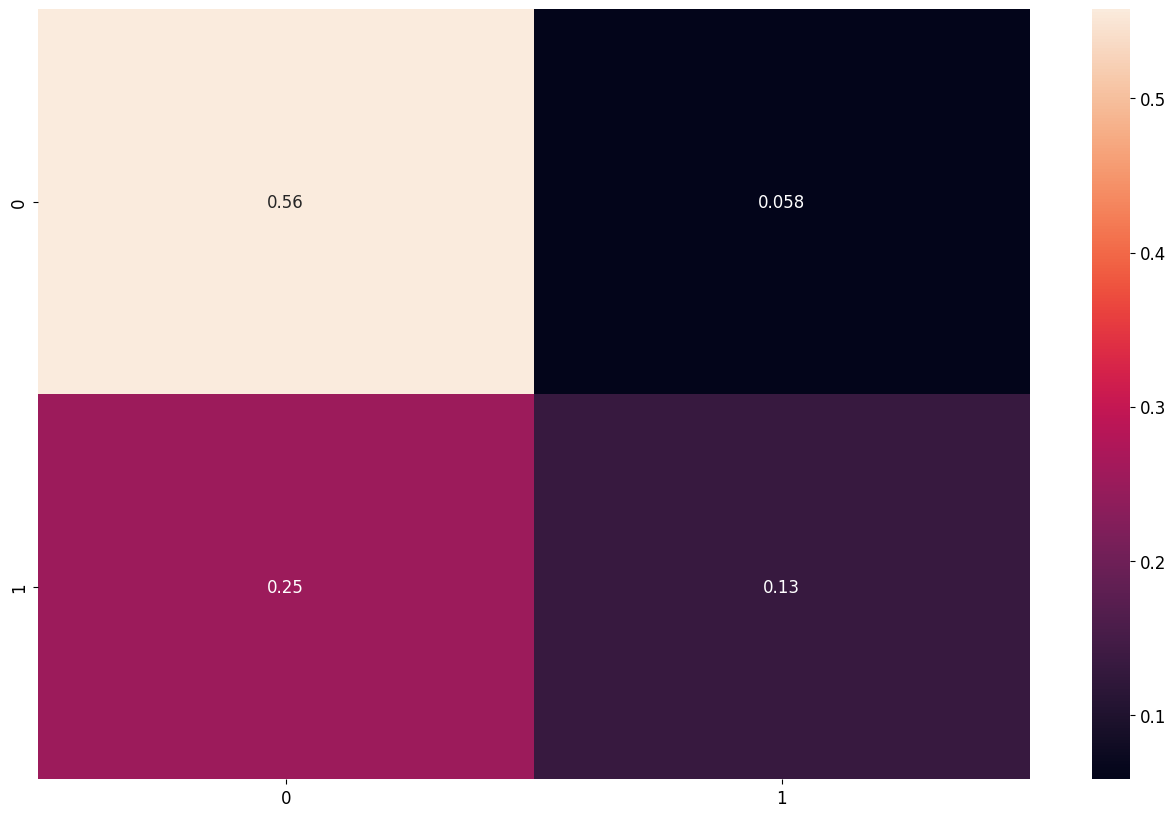

In [ ]:
sns.heatmap(cm, annot=True)

In [ ]:
sc = StandardScaler()
X_ft = sc.fit_transform(X, y)

In [ ]:
model_LR = make_pipeline(
    # OneHotEncoder(handle_unknown="ignore"),
    # StandardScaler(),
    LogisticRegression(solver='liblinear', # newton-cg', 'lbfgs', 'sag', and 'saga'
                       random_state=0,
                       max_iter=500
                       )
)

In [ ]:
cv_results = cross_validate(model_LR, X_ft, y)
cv_results

{'fit_time': array([0.00700116, 0.00599599, 0.00800109, 0.00799847, 0.00499701]),
 'score_time': array([0.00100136, 0.00100112, 0.00100422, 0.00199604, 0.00100064]),
 'test_score': array([0.80446927, 0.82022472, 0.80337079, 0.80898876, 0.85393258])}

In [ ]:
score_LR = cv_results["test_score"]
print(f"The accuracy is: {score_LR.mean():.3f} ± {score_LR.std():.3f}")

The accuracy is: 0.818 ± 0.019


## Support Vector Classification

In [ ]:
model_SVC = svm.SVC(max_iter=1000)
model_SVC.fit(X, y.values.ravel())

SVC(max_iter=1000)

In [ ]:
score_SVC = model_SVC.score(X,y)
print(f'Estimation of determination accuracy: {score_SVC * 100:.2f}%')

Estimation of determination accuracy: 61.62%


## Decision tree

In [ ]:
model_DT = tree.DecisionTreeClassifier()

In [ ]:
model_DT.fit(X,y)

DecisionTreeClassifier()

In [ ]:
score_DT = model_DT.score(X,y)
print(f'Estimation of determination accuracy: {score_DT*100:.2f}%')

Estimation of determination accuracy: 99.78%


In [ ]:
df.shape

(891, 34)

## Decision trees (hyperparametres)

In [ ]:
model_DTh = tree.DecisionTreeClassifier()
parameters = {
    'criterion':['entropy', 'gini'],
    'max_depth': range(3,7),
    'min_samples_split': range(10,20),
    'min_samples_leaf': range(5,10)
}
grid_CV = GridSearchCV(model_DTh, parameters, cv = 5)

In [ ]:
%%time
grid_CV.fit(X,y)

CPU times: total: 22.9 s
Wall time: 24.3 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(3, 7),
                         'min_samples_leaf': range(5, 10),
                         'min_samples_split': range(10, 20)})

In [ ]:
model_DTh = grid_CV.best_estimator_

In [ ]:
print(f'Best classifier parameters:', grid_CV.best_params_)

Best classifier parameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 9, 'min_samples_split': 10}


In [ ]:
score_DTh = model_DTh.score(X, y)
print(f'Estimation of determination accuracy: {score_DTh * 100:.2f}%')

Estimation of determination accuracy: 85.75%


In [ ]:
def visualize_DT_method(clf, X, name):
  export_graphviz(clf,feature_names = X.columns, out_file = name + '.dot', filled = True)
  # use the exclamation mark to call the terminal
  !dot -Tpng {name}.dot -o {name}.png
  display(Image(filename=name + '.png'))

'dot' is not recognized as an internal or external command,
operable program or batch file.


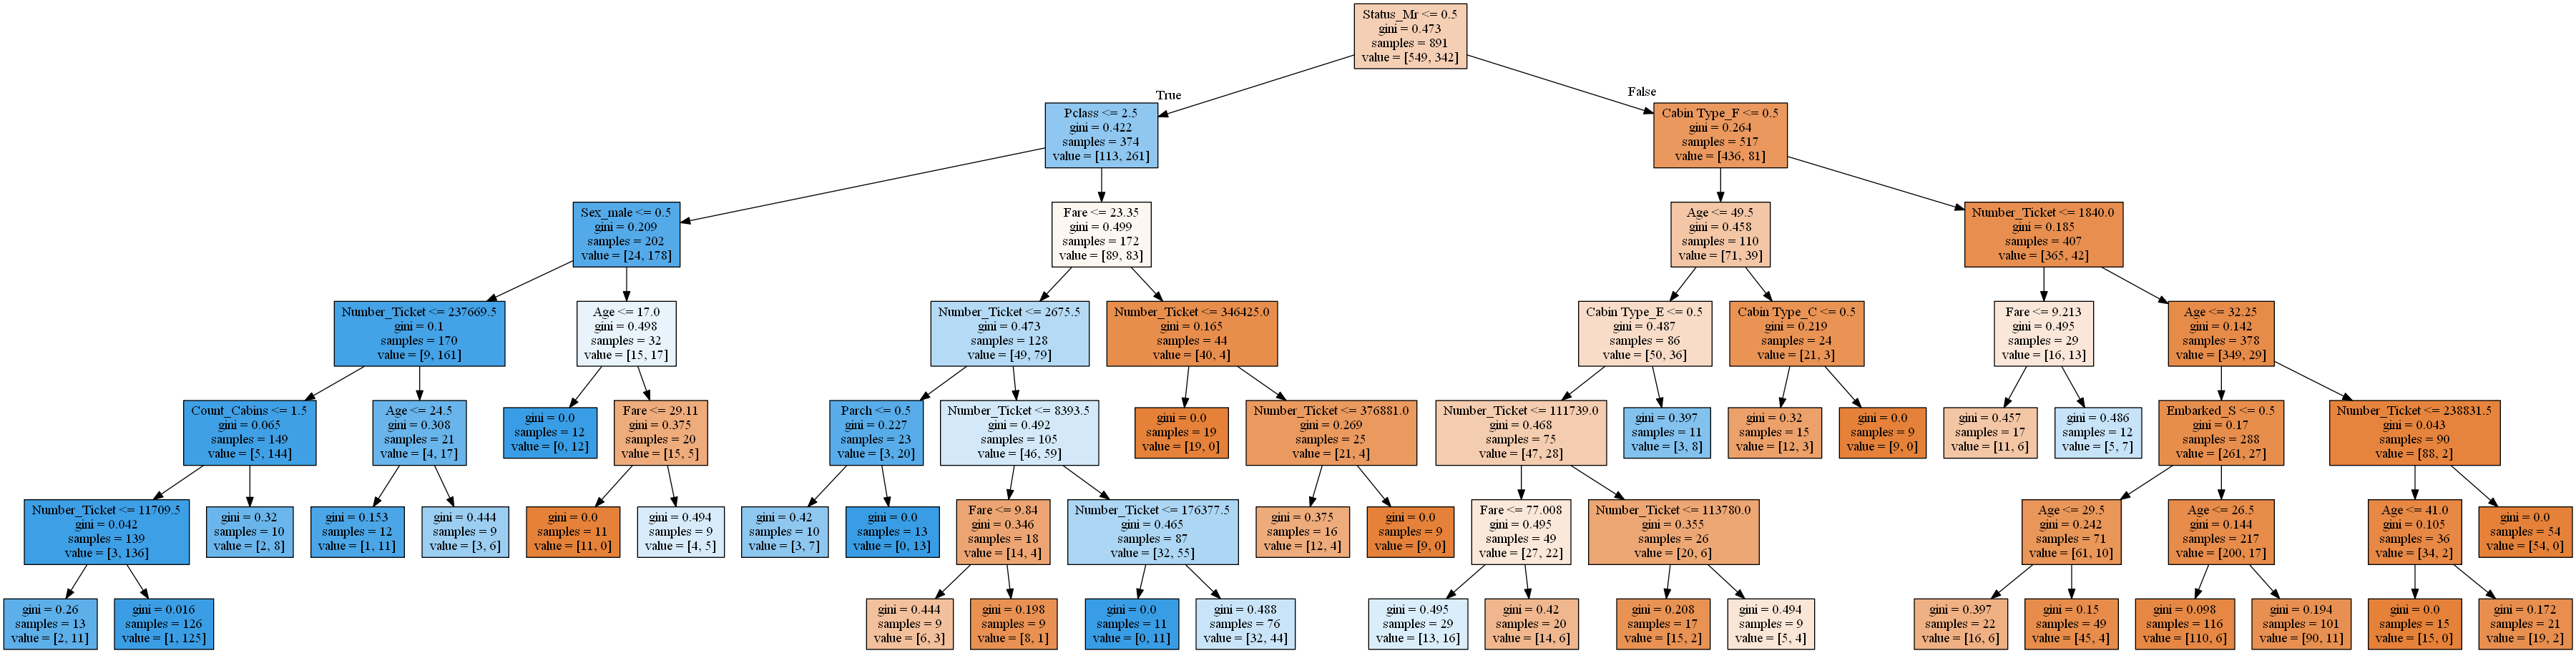

In [ ]:
visualize_DT_method(model_DTh, X, 'tree');

In [ ]:
feature_importance_DTh = pd.DataFrame({"feature": X.columns.to_list(), 'importance': model_DTh.feature_importances_}).sort_values("importance", ascending=False)
feature_importance_DTh

,feature,importance
27,Status_Mr,0.517964
0,Pclass,0.120300
4,Number_Ticket,0.102345
5,Fare,0.097323
1,Age,0.059644
14,Cabin Type_F,0.044584
7,Sex_male,0.037945
13,Cabin Type_E,0.009793
3,Parch,0.004145
6,Count_Cabins,0.002420


<Axes: xlabel='importance', ylabel='feature'>

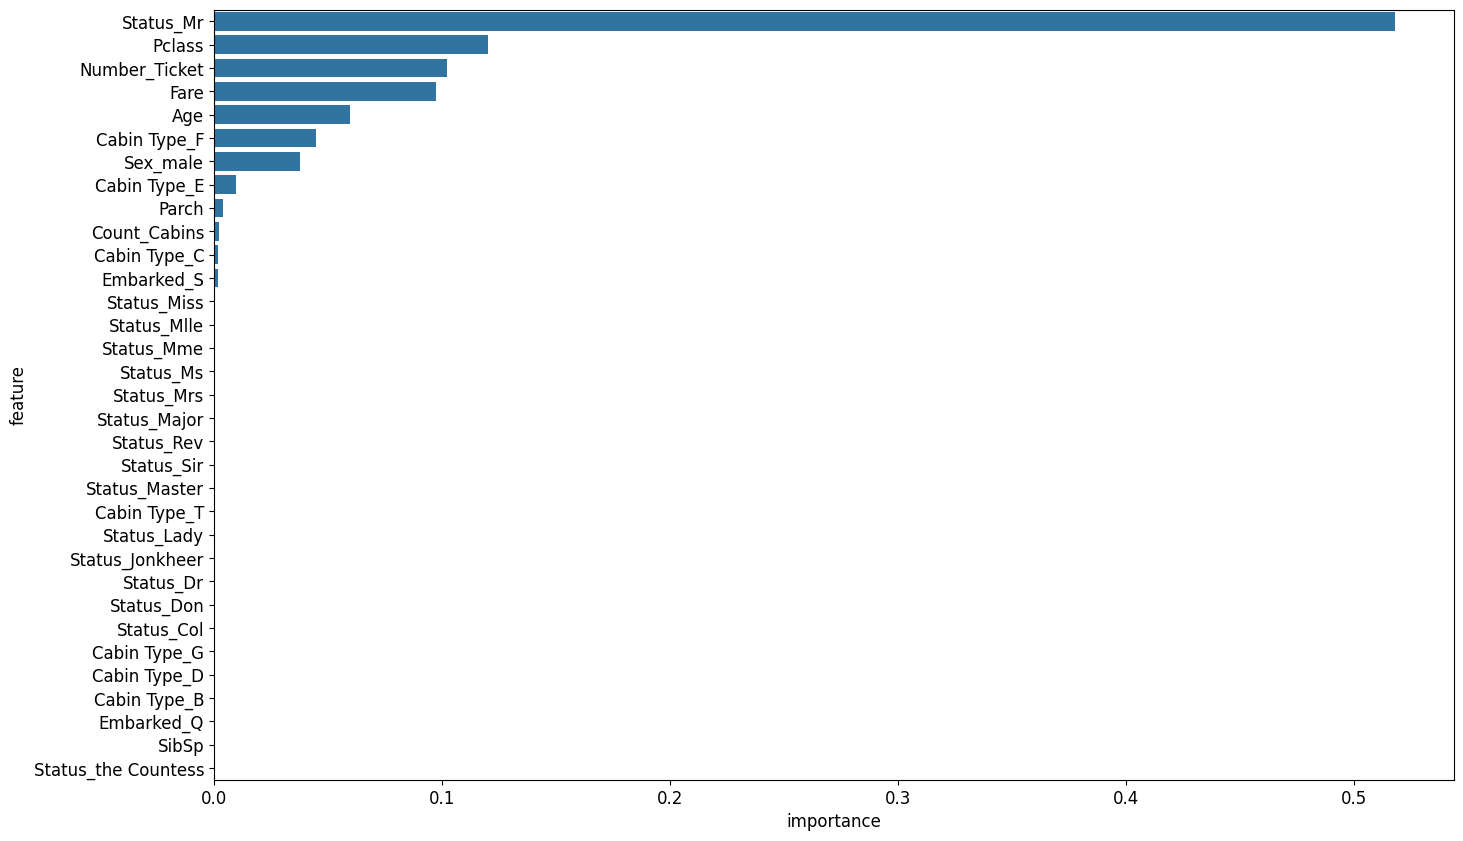

In [ ]:
sns.barplot(data = feature_importance_DTh, x = "importance", y = "feature")

## LightGBM

In [ ]:
model_LGBM = LGBMClassifier(max_depth=6, learning_rate=0.1,  num_leaves=10)

In [ ]:
model_LGBM.fit(X, y)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 342, number of negative: 549
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001645 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 500
[LightGBM] [Info] Number of data points in the train set: 891, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383838 -> initscore=-0.473288
[LightGBM] [Info] Start training from score -0.473288
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier(max_depth=6, num_leaves=10)

In [ ]:
score_LGBM = model_LGBM.score(X, y)
print(f'Estimation of determination accuracy: {score_LGBM * 100:.2f}%')

Estimation of determination accuracy: 91.69%


## XGBClassifier

In [ ]:
model_XGB = XGB.XGBClassifier(max_depth=4, learning_rate=0.01)

In [ ]:
model_XGB.fit(X, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
score_XGB = model_XGB.score(X, y)
print(f'Estimation of determination accuracy: {score_XGB*100:.2f}%')

Estimation of determination accuracy: 84.96%


## CatBoost

In [ ]:
# model_CB = CatBoostClassifier(depth = 5, iterations = 50,
                                        #  l2_leaf_reg = 5, learning_rate = 0.5)

In [ ]:
# model_CB.fit(X, y)

In [ ]:
# score_CB = model_CB.score(X, y)
# print(f'Estimation of determination accuracy: {score_CB * 100:.2f}%')

In [ ]:
print(f'Precision of the Logistic Regression method: {score_LR.mean() * 100:.2f}%')
print(f'Precision of the Support Vector Classification method: {score_SVC * 100:.2f}%')
print(f'Precision of the Decision Trees method with parameters: {score_DT * 100:.2f}%')
print(f'Precision of the Decision Trees method: {score_DTh * 100:.2f}%')
print(f'Precision of the LightGBM method: {score_LGBM * 100:.2f}%')
print(f'Precision of the XGBClassifier method: {score_XGB * 100:.2f}%')
# print(f'Precision of the CatBoost method: {score_CB * 100:.2f}%')

Precision of the Logistic Regression method: 81.82%
Precision of the Support Vector Classification method: 61.62%
Precision of the Decision Trees method with parameters: 99.78%
Precision of the Decision Trees method: 85.75%
Precision of the LightGBM method: 91.69%
Precision of the XGBClassifier method: 84.96%


# Оцінка моделей

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [ ]:
model_LRb_a = LogisticRegression(solver='liblinear', random_state=0).fit(X_train, y_train)

In [ ]:
model_LRb.score(X, y)

0.6891133557800224

In [ ]:
model_LRb_a.score(X_train, y_train)

0.6976047904191617

In [ ]:
model_LRb.score(X_test, y_test)

0.6233183856502242

In [ ]:
model_LRb_a.score(X_test, y_test)

0.6278026905829597

In [ ]:
cm_train = confusion_matrix(y_train, model_LRb_a.predict(X_train))/len(y_train)
cm_train

array([[0.57634731, 0.04041916],
       [0.26197605, 0.12125749]])

In [ ]:
cm_test = confusion_matrix(y_test, model_LRb_a.predict(X_test))/len(y_test)
cm_test

array([[0.5426009 , 0.07174888],
       [0.30044843, 0.08520179]])

<Axes: >

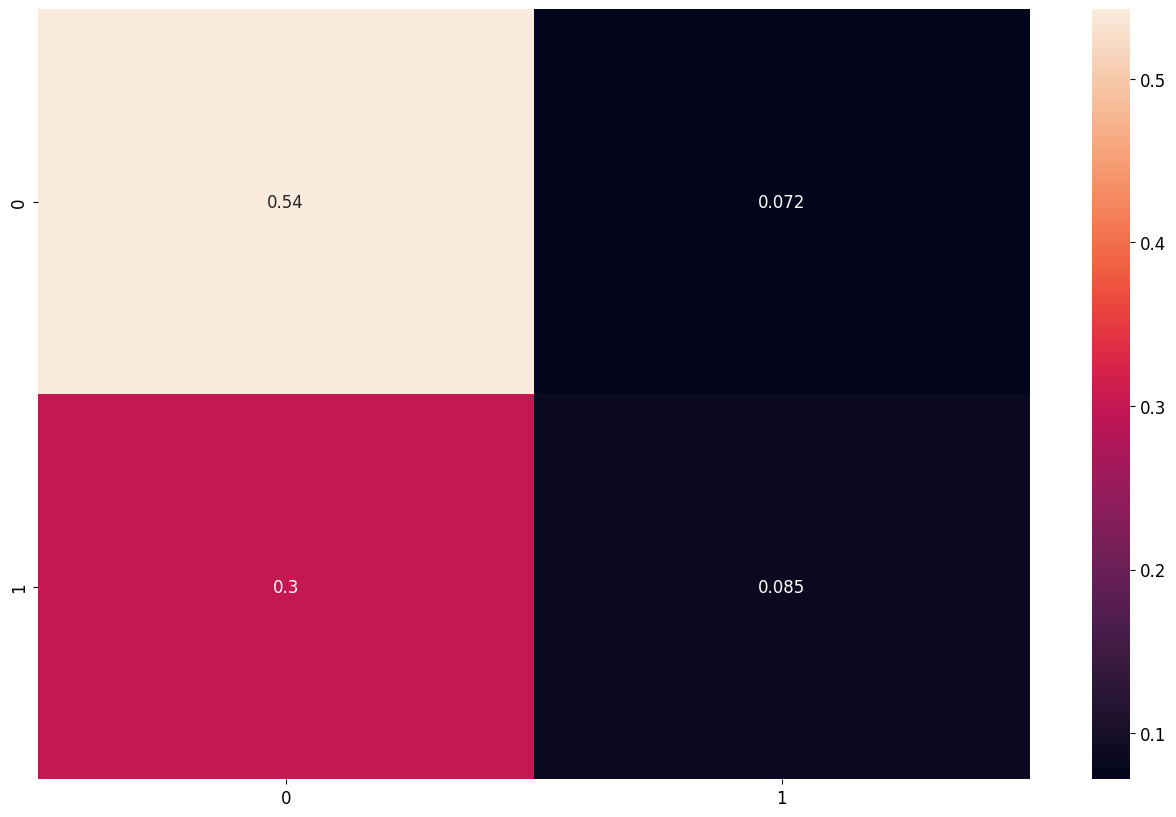

In [ ]:
sns.heatmap(cm_test, annot=True)

In [ ]:
y_pred = model_LRb_a.predict(X_test)

In [ ]:
f1_score(y_test, y_pred, average='weighted')

0.578567588139541

In [ ]:
precision_score(y_test, y_pred)

0.5428571428571428

In [ ]:
roc_auc_score(y_test, y_pred)

0.5520709556951282

In [ ]:
# visualizer = ROCAUC(model_LRb_a, classes=["Not survived", "Survived"])

# visualizer.fit(X_train, y_train)
# visualizer.score(X_test, y_test)
# visualizer.show()

In [ ]:
model_LR_a2 = make_pipeline(
    # OneHotEncoder(handle_unknown="ignore"),
    LogisticRegression(solver='liblinear', # newton-cg', 'lbfgs', 'sag', and 'saga'
                       random_state=0,
                       max_iter=500
                       )
)

In [ ]:
cv_results = cross_validate(model_LR_a2, X_train, y_train)
cv_results

{'fit_time': array([0.00699878, 0.00699735, 0.00500083, 0.00500202, 0.00699806]),
 'score_time': array([0.00300121, 0.00200057, 0.00199962, 0.00300145, 0.00300241]),
 'test_score': array([0.7238806 , 0.67910448, 0.73134328, 0.72932331, 0.69924812])}

In [ ]:
score_LR_a2 = cv_results["test_score"]
print(f"The accuracy is: {score_LR_a2.mean():.3f} ± {score_LR_a2.std():.3f}")

The accuracy is: 0.713 ± 0.020


In [ ]:
cv_results_test = cross_validate(model_LR_a2, X_test, y_test)
cv_results_test

{'fit_time': array([0.00599694, 0.00700617, 0.0079844 , 0.00700045, 0.00701046]),
 'score_time': array([0.00200009, 0.00499725, 0.00399876, 0.00400138, 0.00398827]),
 'test_score': array([0.6       , 0.64444444, 0.6       , 0.63636364, 0.65909091])}

In [ ]:
score_LR_a2_test = cv_results_test["test_score"]
print(f"The accuracy is: {score_LR_a2_test.mean():.3f} ± {score_LR_a2_test.std():.3f}")

The accuracy is: 0.628 ± 0.024


## PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=10)
pca

PCA(n_components=10)

In [ ]:
pca.fit(X)
PCA(n_components=2)
print(pca.explained_variance_ratio_)

[9.99999992e-01 7.46329179e-09 5.35000489e-10 3.84389354e-12
 1.79822051e-12 1.54898913e-12 1.18973403e-12 6.36633096e-13
 4.41593597e-13 2.49147861e-13]


In [ ]:
pca.explained_variance_

array([3.24321917e+11, 2.42050912e+03, 1.73512386e+02, 1.24665893e+00,
       5.83202329e-01, 5.02371128e-01, 3.85856824e-01, 2.06474068e-01,
       1.43218483e-01, 8.08041125e-02])

In [ ]:
pca.n_features_in_

33

In [ ]:
cvm = cross_validate(model_DTh, X_train, y_train)
cvm

{'fit_time': array([0.0069983 , 0.00599933, 0.01099777, 0.00999618, 0.00500059]),
 'score_time': array([0.00200224, 0.00400376, 0.00400019, 0.0040009 , 0.00300145]),
 'test_score': array([0.78358209, 0.79104478, 0.84328358, 0.79699248, 0.80451128])}

# Neural Networks

## Підготовка

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Survived             891 non-null    int64  
 1   Pclass               891 non-null    int64  
 2   Age                  891 non-null    float64
 3   SibSp                891 non-null    int64  
 4   Parch                891 non-null    int64  
 5   Number_Ticket        891 non-null    int32  
 6   Fare                 891 non-null    float64
 7   Count_Cabins         891 non-null    float64
 8   Sex_male             891 non-null    bool   
 9   Embarked_Q           891 non-null    bool   
 10  Embarked_S           891 non-null    bool   
 11  Cabin Type_B         891 non-null    bool   
 12  Cabin Type_C         891 non-null    bool   
 13  Cabin Type_D         891 non-null    bool   
 14  Cabin Type_E         891 non-null    bool   
 15  Cabin Type_F         891 non-null    boo

In [ ]:
continuous = ['Age', 'Fare', 'Parch', 'Pclass', 'SibSp', 'Number_Ticket']

scaler = StandardScaler()

for var in continuous:
    df[var] = df[var].astype('float64')
    df[var] = scaler.fit_transform(df[var].values.reshape(-1, 1))

In [ ]:
# df.describe(include='all').T

## розбивка

In [ ]:
X = df.drop('Survived',axis = 1).astype(float)
y = df['Survived'].astype(float)

In [ ]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## побудова моделі

In [ ]:
def create_model(lyrs=[33], act='linear', opt=tf.keras.optimizers.Adam(0.0001), dr=0.0):

    # set random seed for reproducibility
    seed(42)

    model = Sequential()

    # create first hidden layer
    model.add(Dense(lyrs[0], input_dim=X_train.shape[1], activation=act))

    # create additional hidden layers
    for i in range(1,len(lyrs)):
        model.add(Dense(lyrs[i], activation=act))

    # add dropout, default is none
    model.add(Dropout(dr))

    # create output layer
    model.add(Dense(1, activation='sigmoid'))  # output layer

    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

    return model

In [ ]:
# describe model architecture
model = create_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 33)                1122      
                                                                 
 dropout (Dropout)           (None, 33)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 34        
                                                                 
Total params: 1,156
Trainable params: 1,156
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# train model on full train set, with 80/20 CV split
training = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)


In [ ]:
training.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
val_acc = np.mean(training.history['val_accuracy'])
print("\n%s: %.2f%%" % ('val_acc', val_acc*100))


val_acc: 82.42%


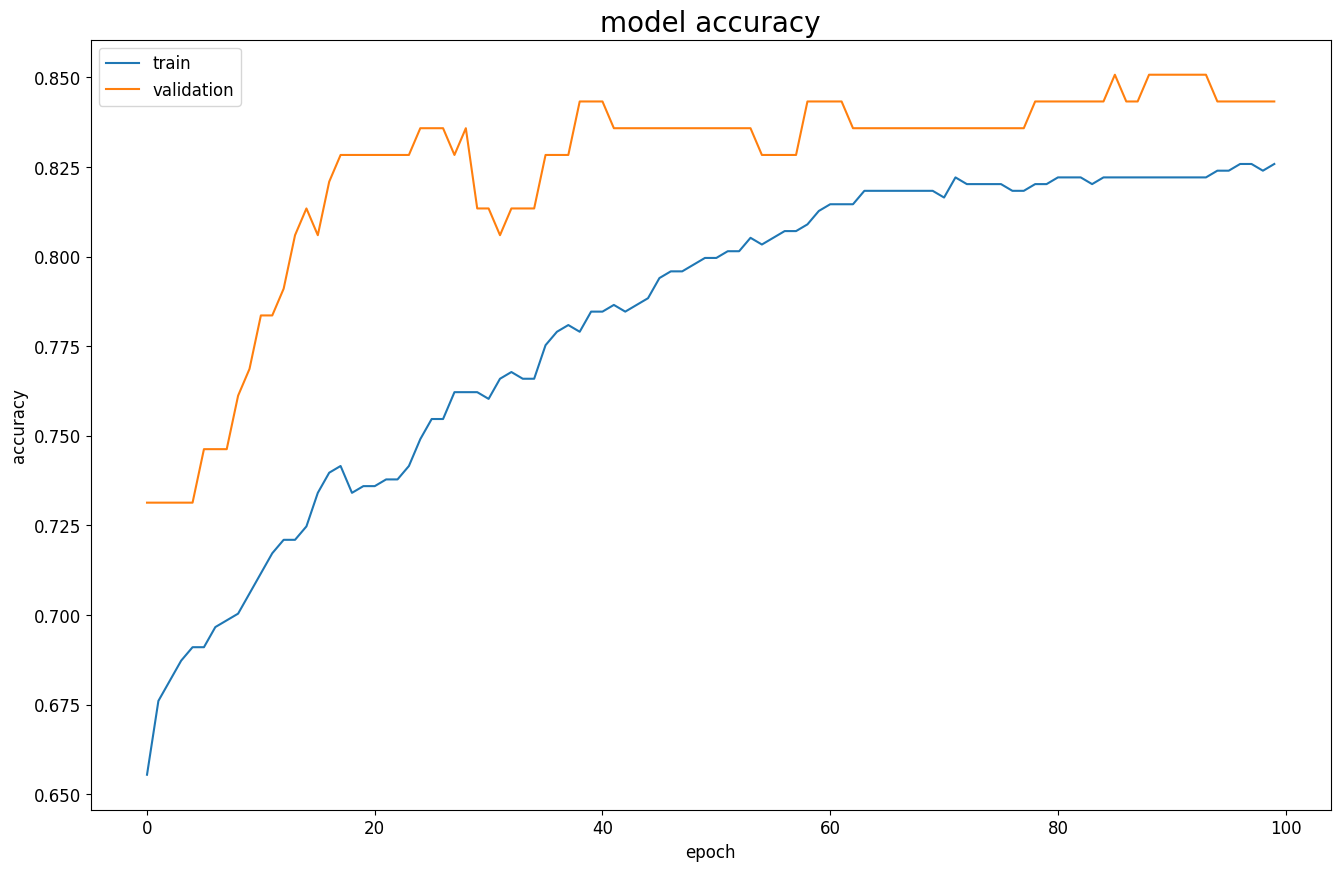

In [ ]:
# summarize history for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


## підбір гіперпараметрів

### batch size and epochs

In [ ]:
# create model
model = KerasClassifier(build_fn=create_model, verbose=0)

# define the grid search parameters
batch_size = [16, 32, 64]
epochs = [50, 100, 200, 500]
param_grid = dict(batch_size=batch_size, epochs=epochs)

# search the grid
grid = GridSearchCV(estimator=model,
                    param_grid=param_grid,
                    cv=3,
                    verbose=2)  # include n_jobs=-1 if you are using CPU

grid_result = grid.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] END ...........................batch_size=16, epochs=50; total time=   3.6s
[CV] END ...........................batch_size=16, epochs=50; total time=   4.8s
[CV] END ...........................batch_size=16, epochs=50; total time=   3.3s
[CV] END ..........................batch_size=16, epochs=100; total time=   5.0s
[CV] END ..........................batch_size=16, epochs=100; total time=   5.0s
[CV] END ..........................batch_size=16, epochs=100; total time=   5.1s
[CV] END ..........................batch_size=16, epochs=200; total time=  10.1s
[CV] END ..........................batch_size=16, epochs=200; total time=   9.8s
[CV] END ..........................batch_size=16, epochs=200; total time=   8.9s
[CV] END ..........................batch_size=16, epochs=500; total time=  21.3s
[CV] END ..........................batch_size=16, epochs=500; total time=  23.3s
[CV] END ..........................batch_size=16

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.826358 using {'batch_size': 64, 'epochs': 500}
0.815861 (0.016859) with: {'batch_size': 16, 'epochs': 50}
0.814386 (0.008919) with: {'batch_size': 16, 'epochs': 100}
0.821860 (0.011122) with: {'batch_size': 16, 'epochs': 200}
0.823361 (0.015147) with: {'batch_size': 16, 'epochs': 500}
0.812878 (0.001723) with: {'batch_size': 32, 'epochs': 50}
0.817376 (0.007369) with: {'batch_size': 32, 'epochs': 100}
0.821860 (0.011122) with: {'batch_size': 32, 'epochs': 200}
0.824863 (0.015823) with: {'batch_size': 32, 'epochs': 500}
0.811349 (0.013623) with: {'batch_size': 64, 'epochs': 50}
0.812878 (0.018388) with: {'batch_size': 64, 'epochs': 100}
0.826351 (0.004059) with: {'batch_size': 64, 'epochs': 200}
0.826358 (0.013731) with: {'batch_size': 64, 'epochs': 500}


### Optimization Algorithm

In [ ]:
# create model
model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=32, verbose=0)

# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Nadam']
param_grid = dict(opt=optimizer)

# search the grid
grid = GridSearchCV(estimator=model, param_grid=param_grid, verbose=2)
grid_result = grid.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ............................................opt=SGD; total time=   2.6s
[CV] END ............................................opt=SGD; total time=   2.0s
[CV] END ............................................opt=SGD; total time=   2.1s
[CV] END ............................................opt=SGD; total time=   2.2s
[CV] END ............................................opt=SGD; total time=   2.5s
[CV] END ........................................opt=RMSprop; total time=   3.2s
[CV] END ........................................opt=RMSprop; total time=   3.0s
[CV] END ........................................opt=RMSprop; total time=   3.2s
[CV] END ........................................opt=RMSprop; total time=   2.7s
[CV] END ........................................opt=RMSprop; total time=   2.4s
[CV] END ........................................opt=Adagrad; total time=   2.3s
[CV] END ........................................

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.829335 using {'opt': 'Nadam'}
0.812804 (0.041862) with: {'opt': 'SGD'}
0.826338 (0.033980) with: {'opt': 'RMSprop'}
0.708080 (0.028393) with: {'opt': 'Adagrad'}
0.498721 (0.111285) with: {'opt': 'Adadelta'}
0.829323 (0.036245) with: {'opt': 'Adam'}
0.829335 (0.034273) with: {'opt': 'Nadam'}


### add hidden neurons

In [ ]:
# create model
model = KerasClassifier(build_fn=create_model,
                        epochs=200, batch_size=32, verbose=0)

# define the grid search parameters
layers = [[8],[10],[10,5],[12,6],[12,8,4], [33, 12, 8, 4], [33, 12, 8, 4]]
param_grid = dict(lyrs=layers)

# search the grid
grid = GridSearchCV(estimator=model, param_grid=param_grid, verbose=2)
grid_result = grid.fit(X_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] END ...........................................lyrs=[8]; total time=   7.4s
[CV] END ...........................................lyrs=[8]; total time=   5.7s
[CV] END ...........................................lyrs=[8]; total time=   5.8s
[CV] END ...........................................lyrs=[8]; total time=   5.9s
[CV] END ...........................................lyrs=[8]; total time=   6.2s
[CV] END ..........................................lyrs=[10]; total time=   5.8s
[CV] END ..........................................lyrs=[10]; total time=   6.3s
[CV] END ..........................................lyrs=[10]; total time=   5.7s
[CV] END ..........................................lyrs=[10]; total time=   5.9s
[CV] END ..........................................lyrs=[10]; total time=   7.4s
[CV] END .......................................lyrs=[10, 5]; total time=   7.6s
[CV] END .......................................l

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.832308 using {'lyrs': [33, 12, 8, 4]}
0.815789 (0.035671) with: {'lyrs': [8]}
0.815834 (0.025551) with: {'lyrs': [10]}
0.829301 (0.031390) with: {'lyrs': [10, 5]}
0.814308 (0.030488) with: {'lyrs': [12, 6]}
0.821838 (0.029800) with: {'lyrs': [12, 8, 4]}
0.832308 (0.036350) with: {'lyrs': [33, 12, 8, 4]}
0.827842 (0.031400) with: {'lyrs': [33, 12, 8, 4]}


### add activation function

In [ ]:
# create model
model = KerasClassifier(build_fn=create_model,
                        epochs=50, batch_size=32, verbose=0)

# define the grid search parameters
act = ['linear', 'sigmoid', 'relu', 'leakyrelu', 'elu']
param_grid = dict(act=act)

# search the grid
grid = GridSearchCV(estimator=model, param_grid=param_grid, verbose=2)
grid_result = grid.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END .........................................act=linear; total time=   2.3s
[CV] END .........................................act=linear; total time=   2.0s
[CV] END .........................................act=linear; total time=   3.2s
[CV] END .........................................act=linear; total time=   2.9s
[CV] END .........................................act=linear; total time=   2.1s
[CV] END ........................................act=sigmoid; total time=   2.1s
[CV] END ........................................act=sigmoid; total time=   2.0s
[CV] END ........................................act=sigmoid; total time=   2.0s
[CV] END ........................................act=sigmoid; total time=   2.4s
[CV] END ........................................act=sigmoid; total time=   3.3s
[CV] END ...........................................act=relu; total time=   3.0s
[CV] END ........................................

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.818853 using {'act': 'relu'}
0.817316 (0.041711) with: {'act': 'linear'}
0.746931 (0.043634) with: {'act': 'sigmoid'}
0.818853 (0.021918) with: {'act': 'relu'}
nan (nan) with: {'act': 'leakyrelu'}
0.806845 (0.028048) with: {'act': 'elu'}


### add dropout

In [ ]:
# create model
model = KerasClassifier(build_fn=create_model,
                        epochs=50, batch_size=32, verbose=0)

# define the grid search parameters
drops = [0.0, 0.01, 0.05, 0.1, 0.2, 0.5]
param_grid = dict(dr=drops)
grid = GridSearchCV(estimator=model, param_grid=param_grid, verbose=2)
grid_result = grid.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END .............................................dr=0.0; total time=   2.1s
[CV] END .............................................dr=0.0; total time=   2.0s
[CV] END .............................................dr=0.0; total time=   2.1s
[CV] END .............................................dr=0.0; total time=   2.1s
[CV] END .............................................dr=0.0; total time=   2.8s
[CV] END ............................................dr=0.01; total time=   2.5s
[CV] END ............................................dr=0.01; total time=   2.2s
[CV] END ............................................dr=0.01; total time=   2.2s
[CV] END ............................................dr=0.01; total time=   2.0s
[CV] END ............................................dr=0.01; total time=   2.1s
[CV] END ............................................dr=0.05; total time=   2.1s
[CV] END ........................................

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.820301 using {'dr': 0.2}
0.811334 (0.033506) with: {'dr': 0.0}
0.805319 (0.040016) with: {'dr': 0.01}
0.811289 (0.041541) with: {'dr': 0.05}
0.814342 (0.044134) with: {'dr': 0.1}
0.820301 (0.043937) with: {'dr': 0.2}
0.806823 (0.047535) with: {'dr': 0.5}


### final model

In [ ]:
# create final model
model = create_model(lyrs=[33, 12, 8, 4], dr=0.2, act='relu', opt=tf.keras.optimizers.Adam(0.0001))

print(model.summary())

Model: "sequential_162"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_372 (Dense)           (None, 33)                1122      
                                                                 
 dense_373 (Dense)           (None, 12)                408       
                                                                 
 dense_374 (Dense)           (None, 8)                 104       
                                                                 
 dense_375 (Dense)           (None, 4)                 36        
                                                                 
 dropout_157 (Dropout)       (None, 4)                 0         
                                                                 
 dense_376 (Dense)           (None, 1)                 5         
                                                                 
Total params: 1,675
Trainable params: 1,675
Non-trai

### train model on final params

In [ ]:
# train model on final params

training = model.fit(X_train, y_train, epochs=100, batch_size=32,
                     validation_split=0.2, verbose=0)

# evaluate the model
scores = model.evaluate(X_train, y_train)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

21/21 [==============================] - 0s 2ms/step - loss: 0.4550 - accuracy: 0.8263

accuracy: 82.63%


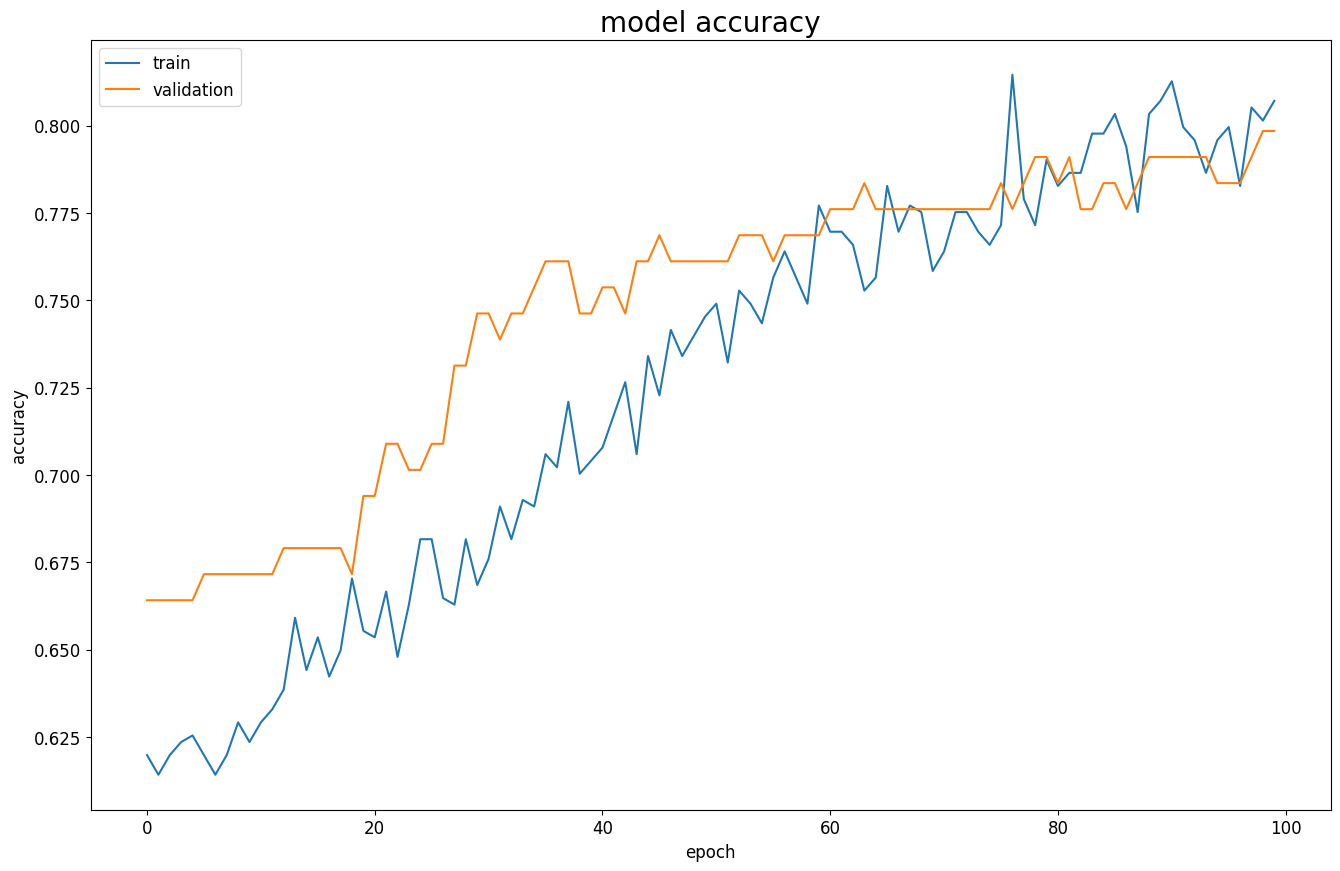

In [ ]:
# summarize history for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### save

In [ ]:
model.save("titanic_model.keras")

### serialize

In [ ]:
loaded_model = tf.keras.models.load_model("titanic_model.keras")

### predict

In [ ]:
loaded_model.predict(X_test[:10])

1/1 [==============================] - 0s 131ms/step


array([[0.48478752],
       [0.17483063],
       [0.16244476],
       [0.650685  ],
       [0.5994345 ],
       [0.6796988 ],
       [0.6292708 ],
       [0.10958293],
       [0.64897   ],
       [0.645019  ]], dtype=float32)

In [ ]:
loaded_model.predict(X_test[:10]) > 0.5

1/1 [==============================] - 0s 28ms/step


array([[False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True]])

## Bonus

### CNN

In [ ]:
nb_filters = 1000
pool_size = (1, 1)
kernel_size = (1, 1)
img_rows, img_cols = 2,2
input_shape = (img_rows, img_cols, 1)

model_CNN = tf.keras.Sequential([
  Convolution2D(nb_filters, kernel_size[0], kernel_size[1],
                          # border_mode='valid',
                          input_shape=input_shape),
  Activation('relu'),
  Convolution2D(nb_filters, kernel_size[0], kernel_size[1]),
  Activation('relu'),
  MaxPooling2D(pool_size=pool_size),
  Dropout(0.25),
  Flatten(),
  Dense(128),
  Activation('tanh'),
  Dropout(0.25),
  Dense(2),
  Activation('sigmoid')

])
model_CNN.compile(loss='mean_squared_error', optimizer='Nadam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=30)

Epoch 1/30
21/21 [==============================] - 0s 2ms/step - loss: 0.4800 - accuracy: 0.7979
Epoch 2/30
21/21 [==============================] - 0s 2ms/step - loss: 0.4775 - accuracy: 0.7725
Epoch 3/30
21/21 [==============================] - 0s 2ms/step - loss: 0.4668 - accuracy: 0.7919
Epoch 4/30
21/21 [==============================] - 0s 2ms/step - loss: 0.4670 - accuracy: 0.7919
Epoch 5/30
21/21 [==============================] - 0s 2ms/step - loss: 0.4703 - accuracy: 0.7979
Epoch 6/30
21/21 [==============================] - 0s 2ms/step - loss: 0.4638 - accuracy: 0.8159
Epoch 7/30
21/21 [==============================] - 0s 2ms/step - loss: 0.4686 - accuracy: 0.7829
Epoch 8/30
21/21 [==============================] - 0s 2ms/step - loss: 0.4680 - accuracy: 0.8069
Epoch 9/30
21/21 [==============================] - 0s 2ms/step - loss: 0.4668 - accuracy: 0.7994
Epoch 10/30
21/21 [==============================] - 0s 2ms/step - loss: 0.4802 - accuracy: 0.7829
Epoch 11/30
21/21 [

In [ ]:
model_CNN = tf.keras.Sequential([

    ## reshaping the input entries
    Dense(512, input_shape=(33,), activation='relu'),
    Dropout(0.50),    ## to avoid overfitting and underfiting

    ## creating the hidden layer
    Dense(512,activation='relu'),
    Dropout(0.70),    ##  to avoid overfitting and underfiting

    Dense(512,activation='relu'),
    Dropout(0.70),     ## to avoid overfitting and underfiting


    ## final neural layer
    Dense(1,activation='sigmoid')

])


model_CNN.compile(optimizer='adam',
             loss='binary_crossentropy',  ## since output in 0 or 1
             metrics=['accuracy'])

In [ ]:
history_CNN = model_CNN.fit(X_train,y_train, epochs=50, validation_split=0.2)

y_pred_cnn = model_CNN.predict(X_test)

cnn_score = model_CNN.evaluate(X_train,y_train)[1]
cnn_score

Epoch 1/50
17/17 [==============================] - 1s 22ms/step - loss: 0.6526 - accuracy: 0.6348 - val_loss: 0.5102 - val_accuracy: 0.7910
Epoch 2/50
17/17 [==============================] - 0s 11ms/step - loss: 0.5605 - accuracy: 0.7135 - val_loss: 0.4342 - val_accuracy: 0.8209
Epoch 3/50
17/17 [==============================] - 0s 10ms/step - loss: 0.5156 - accuracy: 0.7809 - val_loss: 0.4108 - val_accuracy: 0.8209
Epoch 4/50
17/17 [==============================] - 0s 14ms/step - loss: 0.4768 - accuracy: 0.8184 - val_loss: 0.3989 - val_accuracy: 0.8358
Epoch 5/50
17/17 [==============================] - 0s 11ms/step - loss: 0.4687 - accuracy: 0.8015 - val_loss: 0.3783 - val_accuracy: 0.8284
Epoch 6/50
17/17 [==============================] - 0s 11ms/step - loss: 0.4455 - accuracy: 0.8202 - val_loss: 0.3863 - val_accuracy: 0.8358
Epoch 7/50
17/17 [==============================] - 0s 13ms/step - loss: 0.4402 - accuracy: 0.8258 - val_loss: 0.3840 - val_accuracy: 0.8358
Epoch 8/50
17

0.8817365169525146

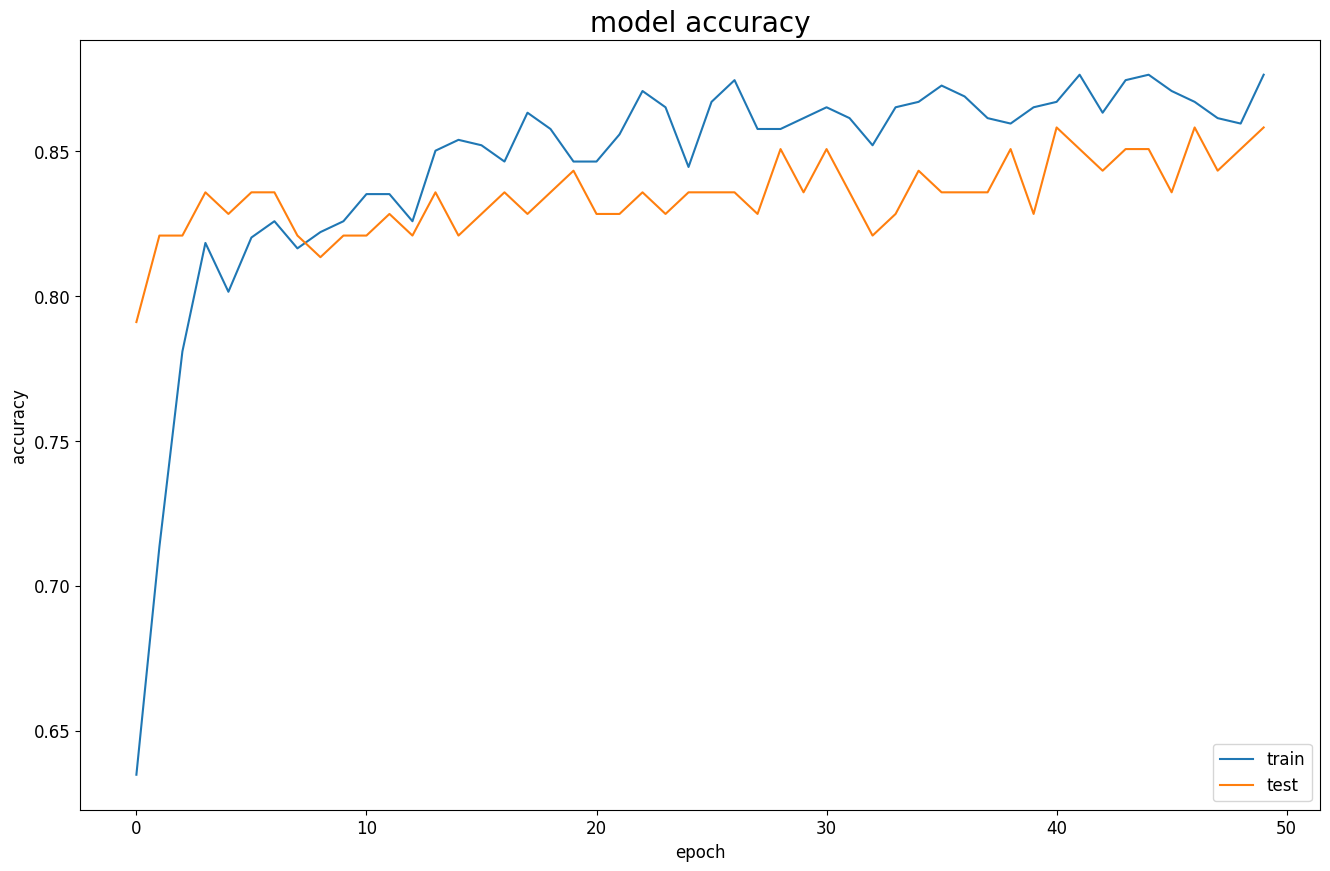

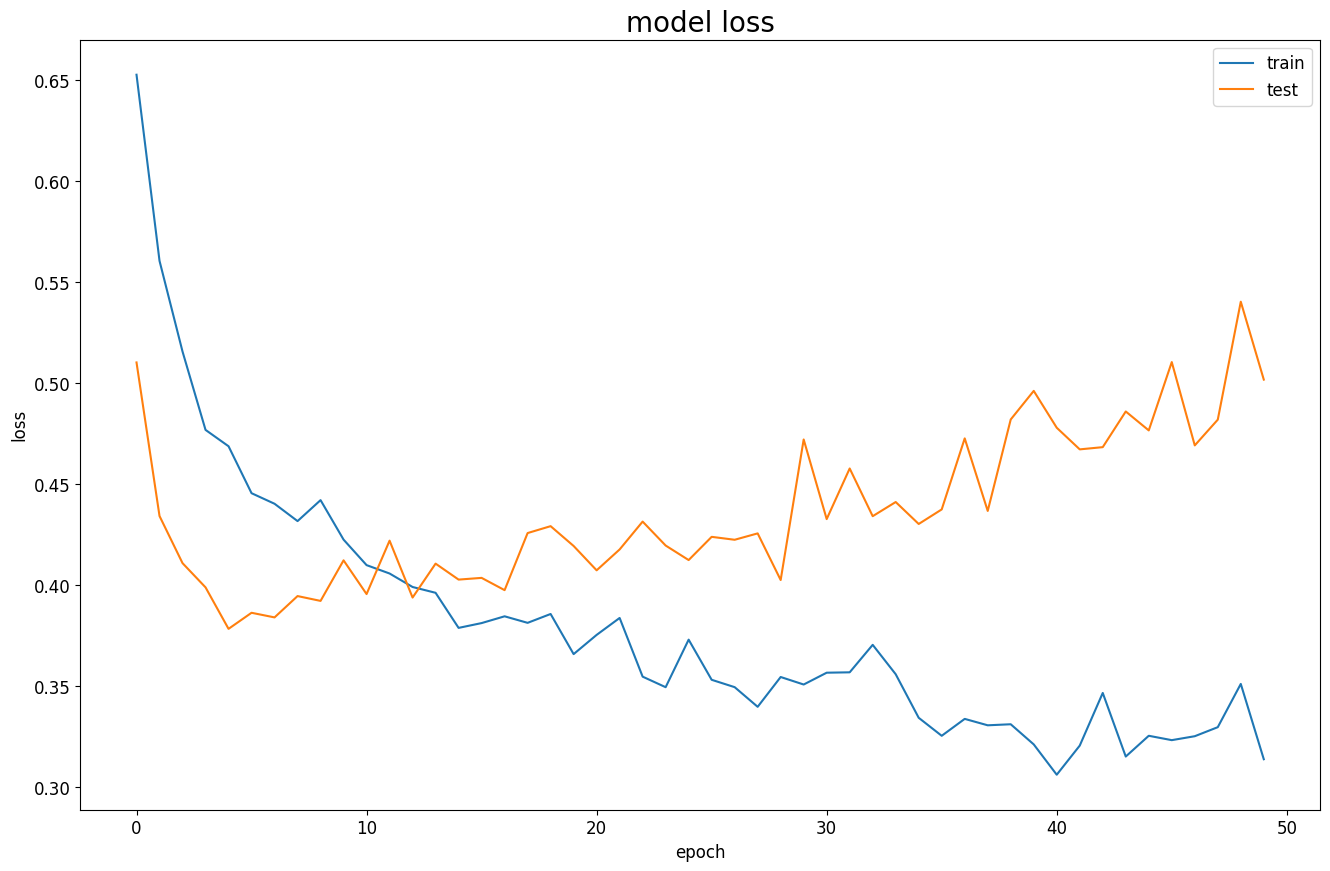

Validation accuracy: 0.858208954334259, loss: 0.5016858577728271


In [ ]:
plt.plot(history_CNN.history['accuracy'])
plt.plot(history_CNN.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()
plt.plot(history_CNN.history['loss'])
plt.plot(history_CNN.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

history2 = history_CNN.history
print('Validation accuracy: {acc}, loss: {loss}'.format(acc=history2['val_accuracy'][-1], loss=history2['val_loss'][-1]))

### LSTM

In [ ]:
batch_size = 4
epoch = 20
hidden_units = 256

In [ ]:
train_x = X_train.iloc[:600].values.reshape(X_train.iloc[:600].values.shape[0],-1,1)
train_x.shape

(600, 33, 1)

In [ ]:
model_LSTM = Sequential()
model_LSTM.add(LSTM(hidden_units, input_shape=train_x.shape[1:], batch_size=batch_size))
model_LSTM.add(Activation('sigmoid'))
model_LSTM.add(Dense(1))
model_LSTM.compile(optimizer='Adam', loss = 'mean_squared_error', metrics = ['accuracy'] )
history_LSTM = model_LSTM.fit(train_x, y_train.values, batch_size=batch_size, epochs=epoch, validation_split=0.2, verbose = 1)

Epoch 1/20
120/120 [==============================] - 8s 48ms/step - loss: 0.2431 - accuracy: 0.6104 - val_loss: 0.2436 - val_accuracy: 0.6000
Epoch 2/20
120/120 [==============================] - 4s 33ms/step - loss: 0.2486 - accuracy: 0.5813 - val_loss: 0.2404 - val_accuracy: 0.6000
Epoch 3/20
120/120 [==============================] - 5s 40ms/step - loss: 0.2588 - accuracy: 0.5604 - val_loss: 0.2485 - val_accuracy: 0.6917
Epoch 4/20
120/120 [==============================] - 6s 50ms/step - loss: 0.2573 - accuracy: 0.5437 - val_loss: 0.2476 - val_accuracy: 0.6000
Epoch 5/20
120/120 [==============================] - 5s 43ms/step - loss: 0.2528 - accuracy: 0.5979 - val_loss: 0.2350 - val_accuracy: 0.6000
Epoch 6/20
120/120 [==============================] - 5s 42ms/step - loss: 0.2436 - accuracy: 0.5896 - val_loss: 0.2151 - val_accuracy: 0.6417
Epoch 7/20
120/120 [==============================] - 5s 38ms/step - loss: 0.2397 - accuracy: 0.5979 - val_loss: 0.2419 - val_accuracy: 0.6000

In [ ]:
test_x = X_test.values
test_x = test_x.reshape(test_x.shape[0],-1,1)
scores = model.evaluate(test_x, y_test, batch_size=batch_size)
predictions = model.predict(test_x, batch_size = batch_size)

56/56 [==============================] - 0s 1ms/step


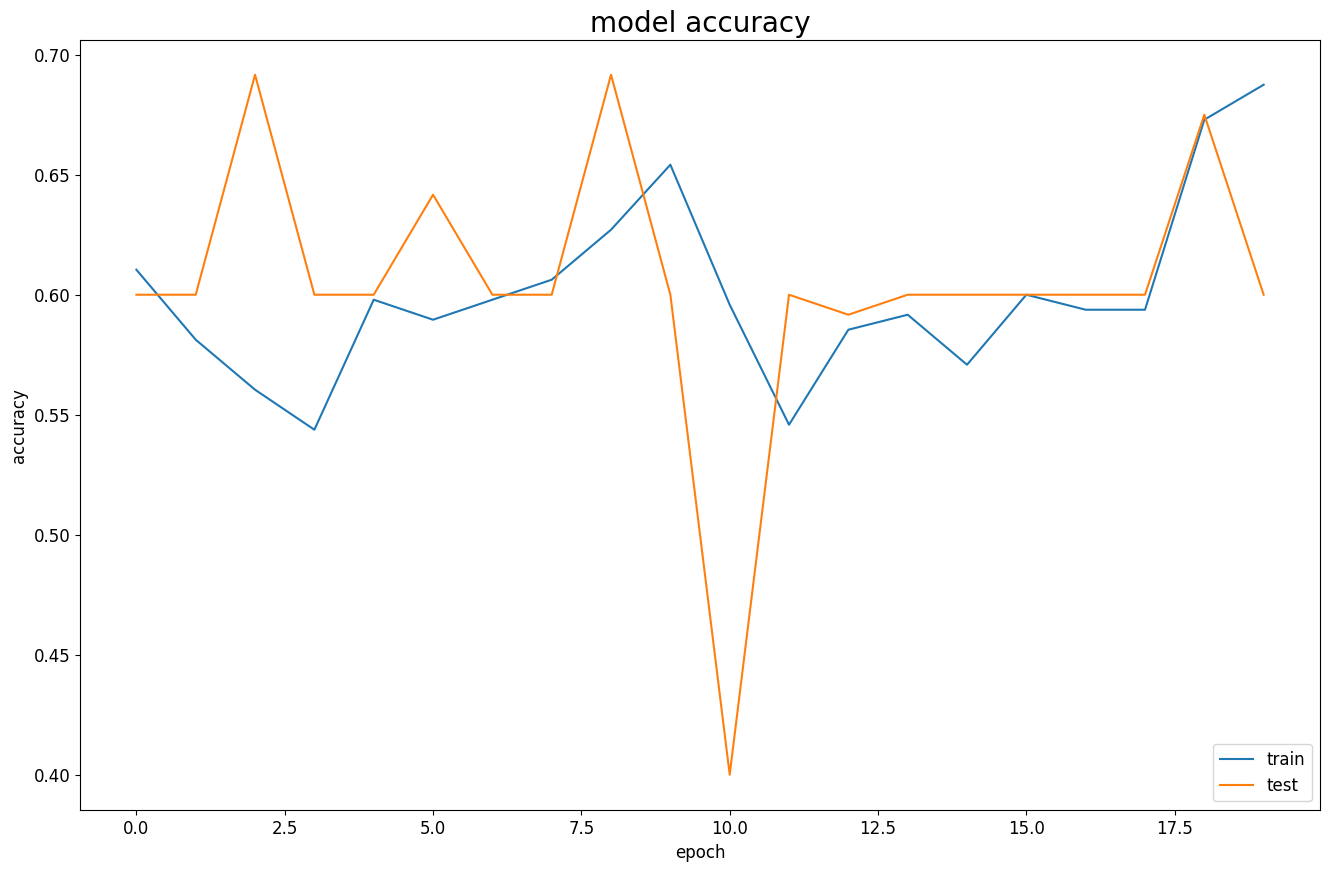

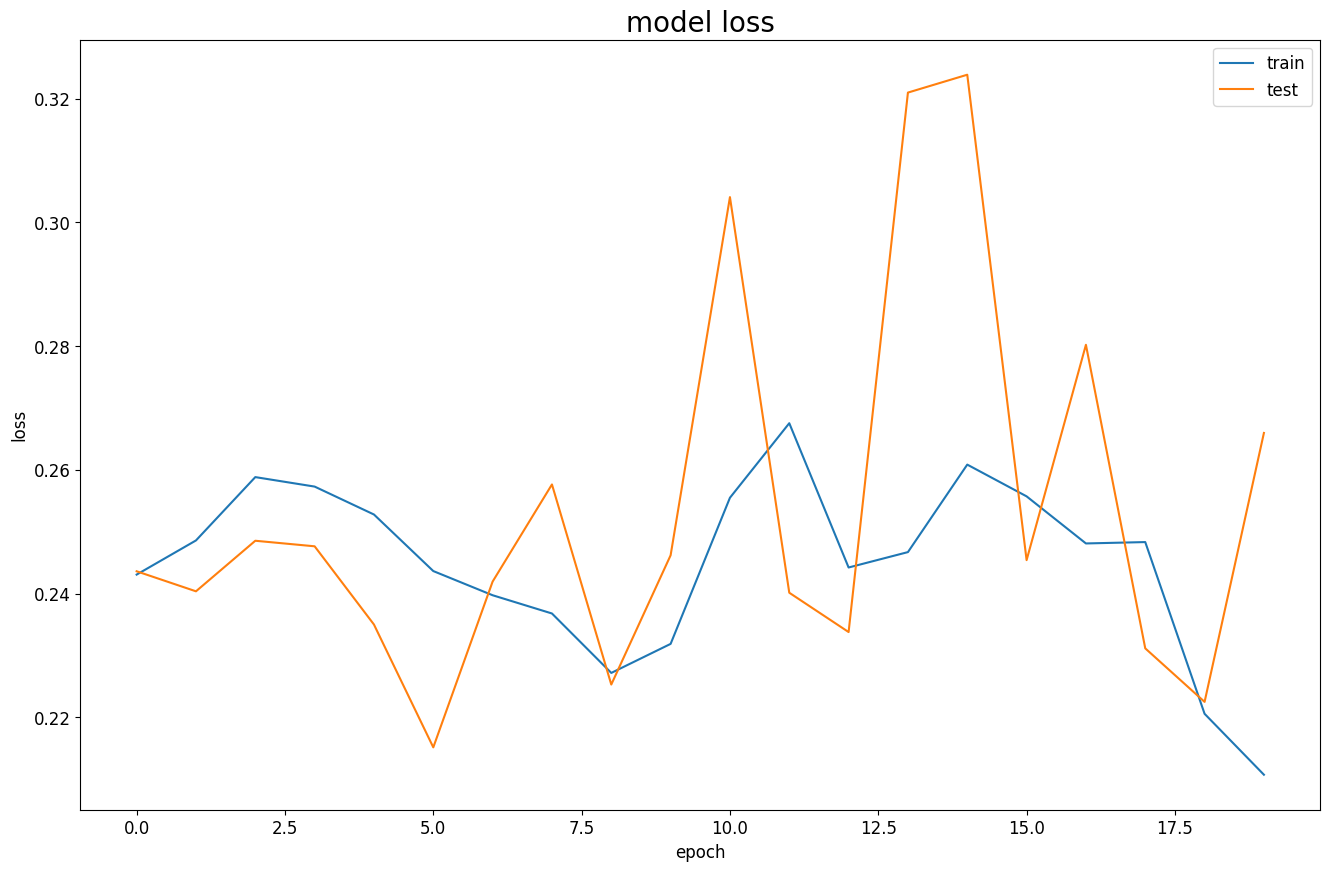

Validation accuracy: 0.6000000238418579, loss: 0.265956312417984


In [ ]:
plt.plot(history_LSTM.history['accuracy'])
plt.plot(history_LSTM.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()
plt.plot(history_LSTM.history['loss'])
plt.plot(history_LSTM.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

history2 = history_LSTM.history
print('Validation accuracy: {acc}, loss: {loss}'.format(acc=history2['val_accuracy'][-1], loss=history2['val_loss'][-1]))